In [1]:
!pip install sklearn

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

In [0]:
from sklearn.model_selection import train_test_split

In [4]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
dftrain = pd.read_excel(io='https://github.com/ajtheb/COVID-inf_prob/blob/master/Train_dataset.xlsx?raw=true')
dfeval = pd.read_excel(io='https://github.com/ajtheb/COVID-inf_prob/blob/master/Test_dataset.xlsx?raw=true')
#y_train = dftrain.pop('Infect_Prob')


In [0]:
#y_train.columns=['Infect_Prob']
#y_train.head()

dftrain['Infect_Prob'] = np.where(dftrain['Infect_Prob'] > 50.00, 1,0)


In [0]:
dftrain,val = train_test_split(dftrain, test_size=0.2)

In [8]:
dftrain.describe()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
count,8571.000000,8331.000000,8571.000000,8571.000000,8571.000000,8571.000000,7999.000000,7832.000000,8556.000000,7682.000000,7682.000000,8543.000000,8571.000000,8571.000000,7.702000e+03,8.571000e+03,7994.000000,8571.000000
mean,10081.381869,1.057856,3.275347,0.521059,42.208960,9.029868,278.730091,87.828779,116.866526,275.517834,74.695782,52.703734,20.013534,5.018901,2.643612e+06,1.308132e+06,1.003503,0.383853
std,7099.295897,0.820075,2.713985,0.851860,15.319814,3.725818,98.038039,41.747481,55.213162,43.697639,14.810921,10.456100,11.866490,1.394812,1.379994e+06,6.077008e+05,0.815365,0.486351
min,1.000000,0.000000,1.000000,0.000000,16.000000,3.000000,110.000000,15.000000,20.000000,200.000000,50.000000,35.000000,0.000000,3.000000,3.000000e+05,3.000000e+05,0.000000,0.000000
25%,2698.500000,0.000000,2.000000,0.000000,29.000000,6.000000,194.000000,52.000000,70.000000,237.000000,62.000000,44.000000,10.000000,4.000000,1.400000e+06,8.000000e+05,0.000000,0.000000
50%,10011.000000,1.000000,2.000000,0.000000,42.000000,9.000000,276.000000,88.500000,117.000000,276.000000,75.000000,53.000000,20.000000,5.000000,2.600000e+06,1.300000e+06,1.000000,0.000000
75%,15156.000000,2.000000,4.000000,1.000000,56.000000,12.000000,365.000000,124.000000,165.000000,313.000000,88.000000,62.000000,30.000000,6.000000,3.800000e+06,1.800000e+06,2.000000,1.000000
max,22694.000000,2.000000,8.000000,2.000000,68.000000,15.000000,450.000000,160.000000,210.000000,350.000000,100.000000,70.000000,40.000000,7.000000,5.000000e+06,2.300000e+06,2.000000,1.000000


In [9]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8571 entries, 10083 to 4664
Data columns (total 28 columns):
people_ID                 8571 non-null int64
Region                    8571 non-null object
Gender                    8571 non-null object
Designation               8571 non-null object
Name                      8555 non-null object
Married                   8571 non-null object
Children                  8331 non-null float64
Occupation                7982 non-null object
Mode_transport            8568 non-null object
cases/1M                  8571 non-null int64
Deaths/1M                 8571 non-null int64
comorbidity               8385 non-null object
Age                       8571 non-null int64
Coma score                8571 non-null int64
Pulmonary score           8571 non-null object
cardiological pressure    8489 non-null object
Diuresis                  7999 non-null float64
Platelets                 7832 non-null float64
HBB                       8556 non-null float

In [0]:
#if required 
#dftrain['salary']=(dftrain['salary']-dftrain['salary'].mean())/dftrain['salary'].std()
dftrain['Insurance']=(dftrain['Insurance']-dftrain['Insurance'].mean())/dftrain['Insurance'].std()

In [0]:
dftrain.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma_score,Pulmonary_score,cardiological_pressure,Diuresis,Platelets,HBB,d-dimer,Heart_rate,HDL_cholesterol,Charlson_Index,Blood_Glucose,Insurance,salary,FT/month,Infect_Prob
79,80,Bhubaneshwar,Female,Mrs,bilke khatoon,YES,1.0,Sales,Public,2,0,None,40,11,<100,Stage-02,272.0,23.0,167.0,306.0,82.0,45.0,16,5,900000.0,500000,0.0,0
8191,15298,Chennai,Male,Mr,affan,YES,1.0,Business,Public,1,0,None,36,4,<100,Stage-02,260.0,83.0,91.0,247.0,85.0,44.0,19,6,1700000.0,2300000,1.0,0
1607,1608,Chandigarh,Female,Mrs,smt tara devi,NO,1.0,NaN,Walk,2,0,Hypertension,17,6,<100,Stage-02,149.0,18.0,40.0,253.0,96.0,42.0,16,7,2600000.0,1300000,0.0,1
10192,22174,Bengaluru,Male,Mr,pramod shrama,YES,0.0,Researcher,Walk,8,2,Coronary Heart Disease,37,15,<200,Stage-01,133.0,132.0,165.0,205.0,67.0,66.0,5,7,2800000.0,1700000,1.0,0
5882,12989,Bhubaneshwar,Male,Mr,subhash mulla,YES,1.0,Sales,Car,2,0,Diabetes,39,11,<400,Normal,353.0,39.0,127.0,237.0,53.0,66.0,4,7,3600000.0,1000000,2.0,0


In [0]:
dftrain.shape[0], dfeval.shape[0]
np.any(np.isnan())

(8571, 14498)

In [0]:
pd.concat([dftrain, y_train], axis=1).groupby('Region').Infect_Prob.mean().plot(kind='barh').set_xlabel('% infect chance')

In [0]:
pd.concat([dftrain, y_train], axis=1).groupby('Gender').Infect_Prob.mean().plot(kind='barh').set_xlabel('% infect chance')

In [0]:
pd.concat([dftrain, y_train], axis=1).groupby('Gender').Infect_Prob.mean().plot(kind='barh').set_xlabel('% infect chance')

In [0]:
pd.concat([dftrain, y_train], axis=1).groupby('Occupation').Infect_Prob.mean().plot(kind='barh').set_xlabel('% infect chance')

In [0]:
pd.concat([dftrain, y_train], axis=1).groupby('Mode_transport').Infect_Prob.mean().plot(kind='barh').set_xlabel('% infect chance')

Text(0.5, 0, '% infect chance')

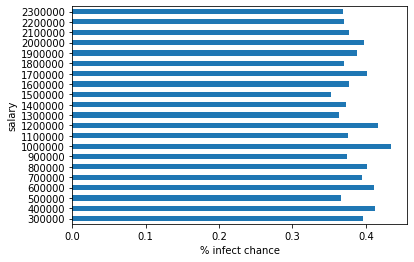

In [0]:
dftrain.groupby('salary')['Infect_Prob'].mean().plot(kind='barh').set_xlabel('% infect chance')

Text(0.5, 0, '% infect chance')

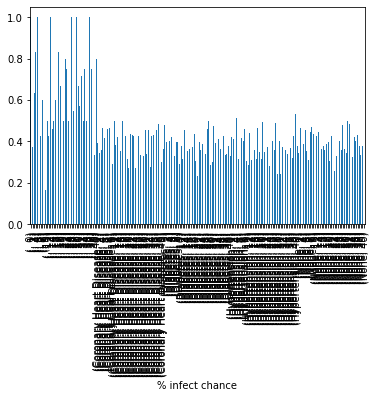

In [0]:
dftrain.groupby(['comorbidity','Charlson_Index'])['Infect_Prob'].mean().plot(kind='bar').set_xlabel('% infect chance')

In [0]:
dftrain.groupby('HBB')['Infect_Prob'].mean().plot(kind='bar').set_xlabel('% infect chance')

In [0]:
#not req
y_train=dftrain.pop('Infect_Prob')

In [0]:
dftrain.rename(columns = {'Coma score':'Coma_score', 'Pulmonary score':'Pulmonary_score', 'cardiological pressure':'cardiological_pressure','Heart rate':'Heart_rate','HDL cholesterol':'HDL_cholesterol','Charlson Index':'Charlson_Index','Blood Glucose':'Blood_Glucose'}, inplace = True)
val.rename(columns = {'Coma score':'Coma_score', 'Pulmonary score':'Pulmonary_score', 'cardiological pressure':'cardiological_pressure','Heart rate':'Heart_rate','HDL cholesterol':'HDL_cholesterol','Charlson Index':'Charlson_Index','Blood Glucose':'Blood_Glucose'}, inplace = True)

In [0]:
val['Mode_transport'].fillna('',inplace=True)
val['Occupation'].fillna('',inplace=True)
val['comorbidity'].fillna('',inplace=True)
val['Name'].fillna('',inplace=True)
val['Region'].fillna('',inplace=True)
val['Pulmonary_score'].fillna('',inplace=True)
val['cardiological_pressure'].fillna('',inplace=True)

In [0]:
df = pd.get_dummies(dftrain)
np.any(np.isnan(df))

In [0]:
dftrain.head()
print(dftrain.columns)

Index(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M', 'Deaths/1M',
       'comorbidity', 'Age', 'Coma_score', 'Pulmonary_score',
       'cardiological_pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart_rate', 'HDL_cholesterol', 'Charlson_Index', 'Blood_Glucose',
       'Insurance', 'salary', 'FT/month', 'Infect_Prob'],
      dtype='object')


In [0]:
dftrain['Name'].fillna('',inplace=True)

In [0]:
feat=['Children','Diuresis','Platelets','HBB','d-dimer','Heart_rate','HDL_cholesterol','Insurance','FT/month']
for f in feat:
  dftrain[f]=dftrain[f].astype(np.int64)
  dftrain[f].fillna(dftrain[f].median(),inplace=True)
  val[f].fillna(val[f].median(),inplace=True)

In [0]:
dftrain['Children'].astype(np.int64)

In [0]:
dftrain.info()

In [0]:
CATEGORICAL_COLUMNS = ['Region','Pulmonary_score','cardiological_pressure','Married']
NUMERIC_COLUMNS = ['Children','Age', 'Coma_score', 'Diuresis', 'Platelets', 'FT/month']
def one_hot_cat_column(feature_name, vocab):
  return tf.feature_column.indicator_column(
      tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocab))
feature_columns = []
dftrain['Mode_transport'].fillna('',inplace=True)
dftrain['Occupation'].fillna('',inplace=True)
dftrain['comorbidity'].fillna('',inplace=True)
for feature_name in CATEGORICAL_COLUMNS:
  dftrain[feature_name].fillna('',inplace=True)
  # Need to one-hot encode categorical features.
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(one_hot_cat_column(feature_name, vocabulary))
for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

Age=tf.feature_column.numeric_column('Age', dtype=tf.float32)
age_buckets = tf.feature_column.bucketized_column(Age, boundaries=[16, 29, 30, 35, 40, 45, 50, 55, 60, 68])
feature_columns.append(age_buckets)

chld=tf.feature_column.numeric_column('Children', dtype=tf.float32)
chld_buckets = tf.feature_column.bucketized_column(chld, boundaries=[0, 1, 2])
feature_columns.append(chld_buckets)
hr=tf.feature_column.numeric_column('Heart_rate', dtype=tf.float32)
hr_b = tf.feature_column.bucketized_column(hr, boundaries=[50, 62,70,88,100])
feature_columns.append(hr_b)

drs=tf.feature_column.numeric_column('Diuresis', dtype=tf.float32)
drs_b = tf.feature_column.bucketized_column(drs, boundaries=[110,194,200,276,364,450])
feature_columns.append(drs_b)

cix=tf.feature_column.numeric_column('Charlson_Index', dtype=tf.float32)
cix_b = tf.feature_column.bucketized_column(cix, boundaries=[0,10,20,30,40])
feature_columns.append(cix_b)
#sal=tf.feature_column.numeric_column('salary', dtype=tf.float32)
#sal_buckets = tf.feature_column.bucketized_column(sal, boundaries=[300000, 800000, 1000000, 1300000, 1500000, 1800000, 2000000, 2300000])
#feature_columns.append(sal_buckets)

vocab = dftrain['comorbidity'].unique()
com=tf.feature_column.categorical_column_with_vocabulary_list('comorbidity',vocab)
vocab = dftrain['Mode_transport'].unique()
Mod_trans=tf.feature_column.categorical_column_with_vocabulary_list('Mode_transport',vocab)
vocab = dftrain['Occupation'].unique()
occ=tf.feature_column.categorical_column_with_vocabulary_list('Occupation',vocab)
vocab = dftrain['cardiological_pressure'].unique()
cp=tf.feature_column.categorical_column_with_vocabulary_list('cardiological_pressure',vocab)
vocab = dftrain['Region'].unique()
rg=tf.feature_column.categorical_column_with_vocabulary_list('Region',vocab)

#crossed_feature = tf.feature_column.crossed_column([age_buckets, com], hash_bucket_size=1000)
#crossed_feature = tf.feature_column.indicator_column(crossed_feature)
#feature_columns.append(crossed_feature)

crossed_feature3 = tf.feature_column.crossed_column([age_buckets,cp ], hash_bucket_size=1000)
crossed_feature3 = tf.feature_column.indicator_column(crossed_feature3)
feature_columns.append(crossed_feature3)
crossed_feature1 = tf.feature_column.crossed_column([age_buckets, Mod_trans], hash_bucket_size=1000)
crossed_feature1 = tf.feature_column.indicator_column(crossed_feature1)
feature_columns.append(crossed_feature1)
crossed_feature2 = tf.feature_column.crossed_column([Mod_trans,occ], hash_bucket_size=1000)
crossed_feature2 = tf.feature_column.indicator_column(crossed_feature2)
feature_columns.append(crossed_feature2)

crossed_feature4 = tf.feature_column.crossed_column([rg,Mod_trans], hash_bucket_size=1000)
crossed_feature4 = tf.feature_column.indicator_column(crossed_feature4)
feature_columns.append(crossed_feature4)
crossed_feature5 = tf.feature_column.crossed_column([hr_b,com], hash_bucket_size=1000)
crossed_feature5 = tf.feature_column.indicator_column(crossed_feature5)
feature_columns.append(crossed_feature5)

crossed_feature6 = tf.feature_column.crossed_column([drs_b,com], hash_bucket_size=1000)
crossed_feature6 = tf.feature_column.indicator_column(crossed_feature6)
feature_columns.append(crossed_feature6)

#crossed_feature7 = tf.feature_column.crossed_column([cp,com], hash_bucket_size=1000)
#crossed_feature7 = tf.feature_column.indicator_column(crossed_feature7)
#feature_columns.append(crossed_feature7)

crossed_feature8 = tf.feature_column.crossed_column([cix_b,com], hash_bucket_size=1000)
crossed_feature8 = tf.feature_column.indicator_column(crossed_feature8)
feature_columns.append(crossed_feature8)

In [0]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    for ele in ds:
      print(ele)
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
#eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [0]:
def df_to_dataset(dataframe, shuffle_and_repeat=True, batch_size=10):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Infect_Prob')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle_and_repeat:
    ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.repeat()
    
  ds = ds.batch(batch_size)
  
  return ds


In [0]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(input_fn=lambda: df_to_dataset(dftrain),steps=500)
#result = linear_est.evaluate(eval_input_fn)

#clear_output()
#print(result)

In [0]:
s=linear_est.evaluate(input_fn=lambda: df_to_dataset(val),steps=100)
clear_output()
print(pd.Series(s))

accuracy                  0.384000
accuracy_baseline         0.616000
auc                       0.500000
auc_precision_recall      0.384000
average_loss            819.136169
label/mean                0.384000
loss                    819.136230
precision                 0.384000
prediction/mean           1.000000
recall                    1.000000
global_step             500.000000
dtype: float64


In [0]:
tf.random.set_seed(13)

In [32]:
n_batches = 1
est = tf.estimator.BoostedTreesClassifier(feature_columns,n_batches_per_layer=n_batches)

# The model will stop training once the specified number of trees is built, not
# based on the number of steps.
est.train(input_fn=lambda: df_to_dataset(dftrain), max_steps=60)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpmc3h_a5p', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


In [33]:
s=est.evaluate(input_fn=lambda: df_to_dataset(val),steps=50)
clear_output()
print(pd.Series(s))

accuracy                 0.716000
accuracy_baseline        0.612000
auc                      0.815899
auc_precision_recall     0.669721
average_loss             0.527389
label/mean               0.388000
loss                     0.527389
precision                0.703125
prediction/mean          0.318375
recall                   0.463918
global_step             60.000000
dtype: float64


In [0]:
dfeval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14498 entries, 0 to 14497
Data columns (total 28 columns):
people_ID                 14498 non-null int64
Region                    14498 non-null object
Gender                    14498 non-null object
Designation               14498 non-null object
Name                      14466 non-null object
Married                   14498 non-null object
Children                  14498 non-null int64
Occupation                14498 non-null object
Mode_transport            14498 non-null object
cases/1M                  14498 non-null int64
Deaths/1M                 14498 non-null int64
comorbidity               14498 non-null object
Age                       14498 non-null int64
Coma score                14498 non-null int64
Pulmonary score           14498 non-null object
cardiological pressure    14498 non-null object
Diuresis                  14498 non-null int64
Platelets                 14498 non-null int64
HBB                       14498 non

In [0]:
dfeval['Infect_Prob']=0
#dfeval.head()
#dfeval.info()
#dftrain.info()
#eval_input_fn=df_to_dataset(dfeval,False)
dfeval['Name'].fillna('',inplace=True)
dfeval.rename(columns = {'Coma score':'Coma_score', 'Pulmonary score':'Pulmonary_score', 'cardiological pressure':'cardiological_pressure','Heart rate':'Heart_rate','HDL cholesterol':'HDL_cholesterol','Charlson Index':'Charlson_Index','Blood Glucose':'Blood_Glucose'}, inplace = True)
pred_dicts = list(est.predict(input_fn=lambda: df_to_dataset(dfeval,False)))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgsumzj4o/model.ckpt-60
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [0]:
pid=list(dfeval['people_ID'])

In [0]:
pid

In [0]:
res=pd.DataFrame(pred_dicts)
prob=list(res['probabilities'])
pr=[]
for l in prob:
  pr.append(l[0])
df = pd.DataFrame(list(zip(pid, pr)), 
               columns =['people_ID', 'infect_prob']) 

In [0]:
df

,people_ID,infect_prob
0,5942,0.561212
1,18664,0.653882
2,5603,0.440247
3,5649,0.201560
4,5099,0.663242
...,...,...
14493,23737,0.996928
14494,11171,0.958626
14495,23243,0.962447
14496,11199,0.959868


In [0]:
df.to_csv("result_part2.csv")
from google.colab import files
files.download('result_part2.csv')

In [0]:
estimator = tf.estimator.DNNLinearCombinedClassifier(
    # wide settings
    linear_feature_columns=feature_columns,dnn_hidden_units=[100]
)
estimator.train(input_fn=lambda: df_to_dataset(dftrain),steps=60)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpzle0j7ez', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

In [0]:
s=estimator.evaluate(input_fn=lambda: df_to_dataset(val),steps=50)
clear_output()
print(pd.Series(s))

accuracy                 0.386000
accuracy_baseline        0.614000
auc                      0.500000
auc_precision_recall     0.386000
average_loss            32.853886
label/mean               0.386000
loss                    32.853886
precision                0.386000
prediction/mean          1.000000
recall                   1.000000
global_step             60.000000
dtype: float64


In [0]:
d27=pd.read_excel(io='https://github.com/ajtheb/COVID-inf_prob/blob/master/diuresis27.xlsx?raw=true')

In [0]:
d27.head()

,Unnamed: 0,Diuresis
0,0,1148.444824
1,1,755.845459
2,2,1148.444702
3,3,1148.444580
4,4,1148.444336


In [0]:
dftrain['Diuresis']=d27['Diuresis']

In [0]:
pid=list(dfeval['people_ID'])

In [0]:
dfeval['Infect_Prob']=0
#dfeval.head()
#dfeval.info()
#dftrain.info()
#eval_input_fn=df_to_dataset(dfeval,False)
dfeval['Name'].fillna('',inplace=True)
dfeval.rename(columns = {'Coma score':'Coma_score', 'Pulmonary score':'Pulmonary_score', 'cardiological pressure':'cardiological_pressure','Heart rate':'Heart_rate','HDL cholesterol':'HDL_cholesterol','Charlson Index':'Charlson_Index','Blood Glucose':'Blood_Glucose'}, inplace = True)
pred_dicts = list(est.predict(input_fn=lambda: df_to_dataset(dfeval,False)))
